# Introduction
In the last project, we learned how to create bar plots to compare the average user rating a movie received from four movie review sites. We also learned how to create scatter plots to explore how ratings on one site compare with ratings on another site. We ended the mission with the observations that user ratings from Metacritic and Rotten Tomatoes spanned a larger range (1.0 to 5.0) while those from Fandango and IMDB spanned a smaller range (2.5 to 5 and 2 to 5 respectively).

In this mission, we'll learn how to visualize the distributions of user ratings using histograms and box plots. We'll continue working with the same dataset from the last mission. Recall that you can download the dataset fandango_scores.csv from the FiveThirtEight Github repo. We've read the dataset into pandas, selected the columns we're going to work with, and assigned the new Dataframe to norm_movies.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

norm_reviews = reviews[cols]

norm_reviews[:5]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5
1,Cinderella (2015),4.0,3.75,3.55,4.5
2,Ant-Man (2015),4.5,4.05,3.90,4.5
3,Do You Believe? (2015),4.2,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0


# Frequency Distribution
Let's first compare the frequency distributions of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). 

While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use Series.sort_index() to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):

In [16]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()

imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

print(fandango_distribution)
print( )
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


# Binning
Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the Fandango_Ratingvalue column ranges from 2.7 to 4.8 while the IMDB_norm column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

- What percent of the ratings are contained in the 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?
    
Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called bins. We can then sum the frequencies for the values that fall into each bin. 

# Histogram In Matplotlib

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

- calculate the minimum and maximum value from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

The default behavior of Axes.hist() is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy.

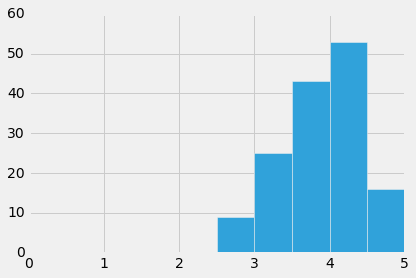

In [17]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

# Comparing Histograms
If you recall, one of the questions we were looking to answer was:

- What percent of the ratings are contained in the 2.0 to 4.0 range?

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). 

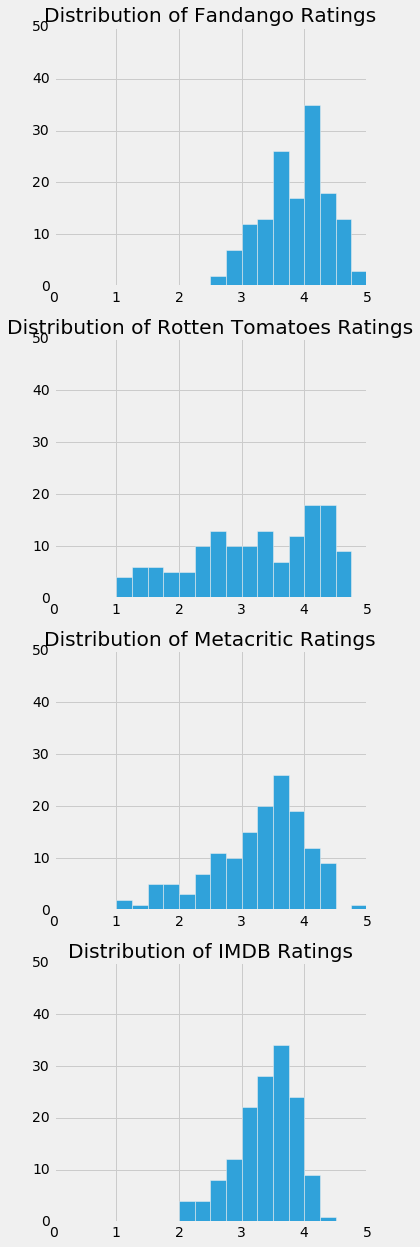

In [21]:
fig = plt.figure(figsize=(5,20))

ax1 = fig.add_subplot(4,1,1)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2 = fig.add_subplot(4,1,2)
ax2.hist(norm_reviews['RT_user_norm'], bins=20, range = (0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3 = fig.add_subplot(4,1,3)
ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range = (0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4 = fig.add_subplot(4,1,4)
ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

# Quartiles
From the histograms, we can make the following observations:

- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quantile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a box plot, also referred to as a box-and-whisker plot.

# Box Plot
A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way. 

The two regions contained within the box in the middle make up the interquartile range, or IQR. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

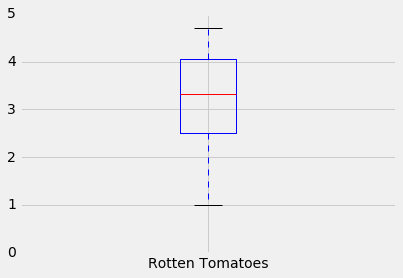

In [23]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(["Rotten Tomatoes"])
ax.set_ylim(0, 5)
plt.show()

# Multiple Box Plots
From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. 

In [ ]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_ylim(0, 5)

plt.show()